# 🏡 Predicting House Prices in Iowa State

Welcome to the **Iowa State House Prices** prediction project. In this notebook, we will explore the dataset, perform data preprocessing, and build a predictive model to estimate house prices based on various features.

---

## 📋 Project Overview


1. **Data Exploration**
   - Initial data analysis and visualization to understand the dataset.
2. **Data Preprocessing**
   - Handling missing values, encoding categorical features, and feature scaling.
3. **Model Building**
   - Training different machine learning models to predict house prices.
4. **Model Evaluation**
   - Evaluating the performance of the models using appropriate metrics.




# Data Exploration

In [803]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [804]:
train_df=pd.read_csv("C:/Users/yyunu/Downloads/train.csv")

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [805]:
train_df.shape

(1460, 81)

In [806]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [807]:
y= train_df.SalePrice
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<Axes: xlabel='SalePrice', ylabel='Count'>

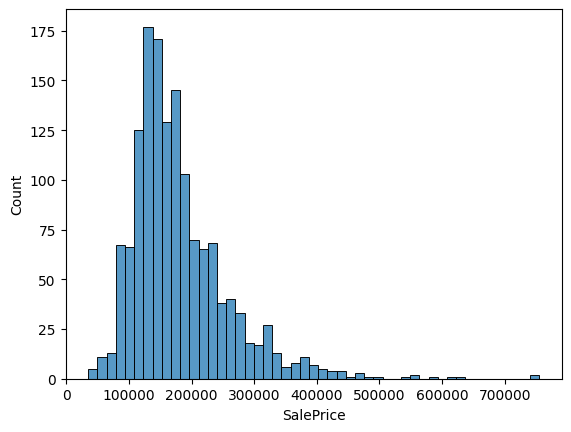

In [808]:
sns.histplot(y)


In [809]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data Preprocessing

In [810]:
na_columns= [col for col in train_df.columns
             if train_df[col].isnull().any()]

na_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [811]:
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns

corr_matrix=numeric_df.corrwith(numeric_df['SalePrice'])
corr_df = pd.DataFrame(corr_matrix, columns=['Correlation'])

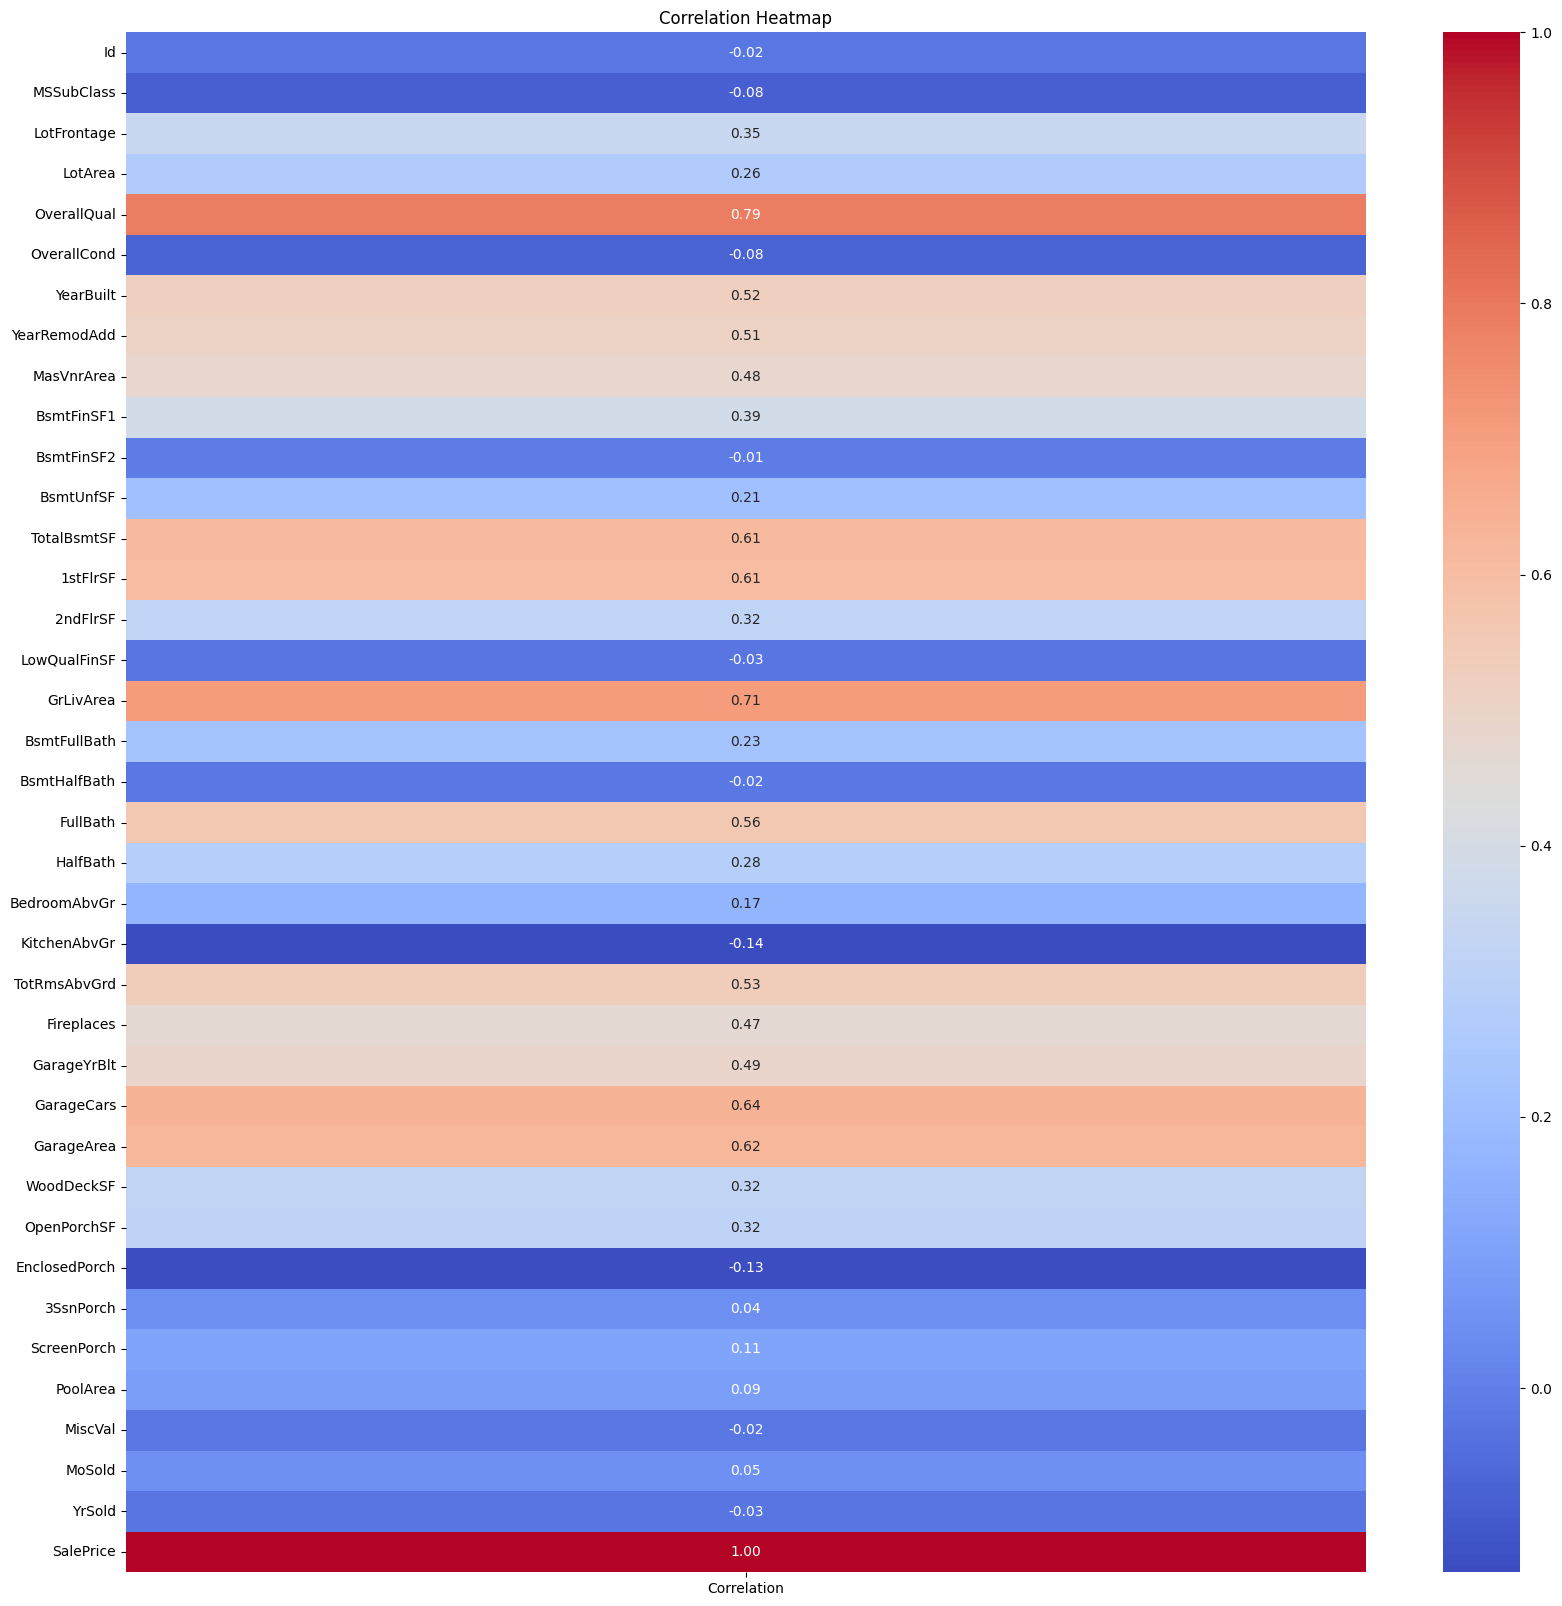

In [812]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True,cmap='coolwarm',  fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [813]:
# features w high correlation are selected
features = [
    'OverallQual', 
    'GrLivArea', 
    'GarageCars',
    "GarageArea", 
    'TotalBsmtSF', 
    '1stFlrSF', 
    'FullBath', 
    'TotRmsAbvGrd', 
    'YearBuilt', 
    'YearRemodAdd',
    'Fireplaces',
  
    
   
]


 

In [814]:
X=train_df[features]

X.sample(4)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Fireplaces
783,5,1110,2,602,1097,1110,1,4,1978,1978,1
852,7,1646,1,240,918,918,2,7,1941,1950,2
782,7,1430,2,605,1413,1430,2,6,2001,2002,0
921,5,2200,0,0,1272,1272,2,9,1900,2003,0


In [815]:
X.isnull().sum()


OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
Fireplaces      0
dtype: int64

# Model Building

In [816]:
from sklearn.model_selection import train_test_split


train_x, test_x, train_y, test_y= train_test_split(X, y, test_size=0.3, random_state=3)

In [817]:
from sklearn.metrics import mean_absolute_error

# Mean absolute error method can be best option since the error is the difference btw prices
def get_error(test_y, predictions):
    mae = mean_absolute_error(test_y,predictions )

    print(f"Mean Absolute Error: {mae}")

In [818]:
from sklearn.linear_model import  LinearRegression

lin_model= LinearRegression()
lin_model.fit(train_x, train_y)

lin_predictions= lin_model.predict(test_x)


get_error(test_y, lin_predictions)

Mean Absolute Error: 23685.715855788832


In [819]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state= 0)
rf_model.fit(train_x, train_y)
rf_predictions = rf_model.predict(test_x)


get_error(test_y, rf_predictions)

Mean Absolute Error: 18984.59394651011


In [820]:
from xgboost import XGBRegressor

xg_model= XGBRegressor(random_state=0,
                       learning_rate=0.01,
                       n_estimators= 300,
                       max_depth=5
                       )

xg_model.fit(train_x, train_y)

xg_predictions= xg_model.predict(test_x)


get_error(test_y, xg_predictions)


Mean Absolute Error: 18100.010166952055


# Model Evaluation

 - It can be concluded that XGBRegressor model has better performance, and we can improve it
 - With codes below best n_estimators can be found

In [821]:
error_i=[]
n=[]
for i in range (100,1000,100):
    
    xg_model = XGBRegressor( n_estimators=i, random_state=0, learning_rate=0.01,max_depth=5)
    xg_model.fit(train_x, train_y)
    xg_predictions = xg_model.predict(test_x)
    
    error_i.append(mean_absolute_error(test_y, xg_predictions))
    n.append(i)



Text(0, 0.5, 'Error')

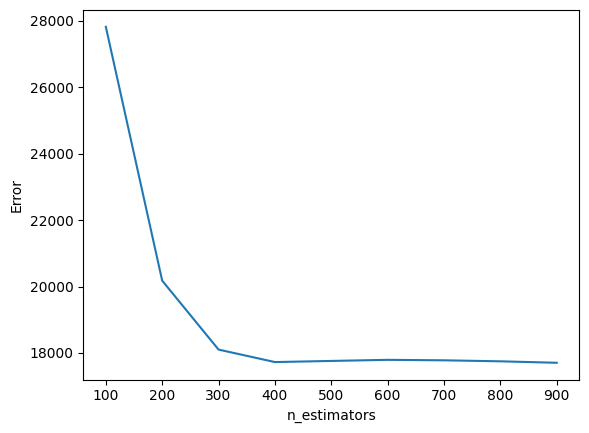

In [822]:
plt.plot(n,error_i)
plt.xlabel("n_estimators")
plt.ylabel("Error")

In [823]:
from xgboost import XGBRegressor

xg_model= XGBRegressor(random_state=0,
                       learning_rate=0.01,
                       n_estimators= 400,
                       max_depth= 5,
                       
                       )

xg_model.fit(train_x, train_y)

xg_predictions= xg_model.predict(test_x)


get_error(test_y, xg_predictions)

Mean Absolute Error: 17724.021528966896


In [824]:
from sklearn.metrics import r2_score

r2_score(test_y, xg_predictions)

0.864911675453186

### 0.865  accuracy can be accepted as succesful

In [825]:
full_xg_model= XGBRegressor(random_state=0,
                       learning_rate=0.01,
                       n_estimators= 500,
                       max_depth= 5,
                       
                       )

xg_model.fit(X, y)

#Finally we fitted whole data we have




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)